# Exam 28th of August 2024 — Course 1MS041 (Introduction to Data Science)

## 1.1 Instructions
1. Complete the problems by following instructions.  
2. When done, submit this file with your solutions saved, following the instruction sheet.

This exam has **3 problems** for a total of **40 points**, to pass you need **20 points**.  
The bonus will be added to the score and rounded afterwards.

## 1.2 Some general hints and information
- Try to answer all questions even if you are uncertain.  
- Comment your code — partial credit is given if your reasoning is clear.  
- Follow the instruction sheet rigorously.  
- The exam is partially autograded, but your code and free text answers are manually graded anonymously.

## 1.3 Tips for free text answers
You can write LaTeX in Markdown cells:

- `$f(x) = x^2$` → inline math  
- `$$f(x)=x^2$$` → centered display math  

Example:

$$f_{Y|X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha x + \beta)$$

## 1.4 Rules
- You may **not communicate with others** during the exam.  
- You may **not use AI systems such as ChatGPT**.  
- Your online and offline activity may be monitored.

## 1.5 Good luck!

---

### Insert your anonymous exam ID below:


In [2]:
examID = "XXX"

### Exam vB, PROBLEM 1  
**Maximum Points = 14**

In this problem you will do rejection sampling from complicated distributions, and you will also use your samples to compute certain integrals, a method known as *Monte Carlo integration*.  
(Keep in mind that choosing a good sampling distribution is often key to avoid too much rejection.)

1. **[4p]** Fill in the remaining part of the function `problem1_rejection` in order to produce samples from the density, using rejection sampling:

$$f(x) = C (\sin (x))^{10}, \quad 0 \le x \le \pi$$


where \(C\) is a value such that \(f\) above is a density (i.e. integrates to one).  
*Hint:* you do not need to know the value of \(C\) to perform rejection sampling.

2. **[2p]** Produce 10 000 samples (use fewer if it takes too long) from the above distribution, put the answer in the variable `problem1_samples`, and plot the histogram.

3. **[2p]** Define \(X\) as a random variable with the density given in part 1. Denote


$$Y = \left(X - \frac{\pi}{2}\right)^2$$


and use the 10 000 samples to estimate ${E}[Y]$. Store the result in `problem1_expectation`.

4. **[2p]** Use Hoeffding’s inequality to produce a 95% confidence interval of the expectation above and store the result as a tuple in the variable `problem1_interval`.

5. **[4p]** Can you calculate an approximation of the value of \(C\) from part 1 using random samples?  
Provide a plot of the histogram from part 2 together with the true density as a curve (this requires the value of \(C\)).  
Explain what method you used and what answer you got.


In [3]:
# IMPORTS:
import numpy as np
import pandas as pd

#import sys
#!{sys.executable} -m pip install matplotlib

import matplotlib.pyplot as plt

## This is simply the way to think to solve this question:

# Rejection Sampling Summary for  
# $ f(x) = C (\sin x)^{10},\; 0 \le x \le \pi $

We want to sample from the target density  
$$
f(x) = C (\sin x)^{10},
$$
where $C$ is an unknown normalizing constant.  
Rejection sampling works even when the constant $C$ is unknown.

---

## 1. Rejection Sampling Overview

Given a target density $p(x)$ and a proposal density $g(x)$:

1. Sample $X \sim g(x)$.
2. Sample $U \sim \text{Uniform}(0,1)$.
3. Accept $X$ if  
$$
U \le \frac{\tilde f(X)}{M\, g(X)},
$$
where $\tilde f(x)$ is the unnormalized target density (we ignore $C$).

We only need to guarantee  
$$
\tilde f(x) \le M g(x) \quad \forall x.
$$

---

## 2. Applying This to $ f(x) = C (\sin x)^{10} $

### Unnormalized target

$$
\tilde f(x) = (\sin x)^{10}.
$$

### Proposal distribution

We choose a Uniform distribution on the interval $[0,\pi]$:
$$
X \sim \text{Uniform}(0,\pi).
$$

For a uniform distribution on an interval of length $\pi$,  
the probability density is constant everywhere on that interval and zero outside it.

A probability density must integrate to 1, so we require
$$
\int_0^\pi g(x)\, dx = 1.
$$

If $g(x)$ is constant, call it $k$:
$$
\int_0^\pi k \, dx = k\pi = 1.
$$

Thus
$$
k = \frac{1}{\pi},
$$
so the proposal density is
$$
g(x) = \frac{1}{\pi} \qquad (0 \le x \le \pi).
$$

### Finding $M$

We need to bound the ratio
$$
\frac{\tilde f(x)}{g(x)}
= \frac{(\sin x)^{10}}{1/\pi}
= \pi (\sin x)^{10}.
$$

Since $(\sin x)^{10} \le 1$ with a maximum at $x = \pi/2$, we obtain:
$$
M = \pi.
$$

### Acceptance probability

The acceptance probability becomes
$$
\alpha(x) = \frac{\tilde f(x)}{M g(x)}
= \frac{(\sin x)^{10}}{\pi \cdot (1/\pi)}
= (\sin x)^{10}.
$$

Thus the full rejection sampling procedure is:

1. Draw $X \sim \text{Uniform}(0,\pi)$.
2. Draw $U \sim \text{Uniform}(0,1)$.
3. Accept $X$ if  
$$
U \le (\sin X)^{10}.
$$

No knowledge of the constant $C$ is required.





In [4]:
# Part 1
"""
Fill in the remaining part of the function `problem1_rejection` in order to produce samples from the density, 
using rejection sampling:
    f(x) = C * (sin(x))^{10}, where 0 <= x <= pi
"""

def problem1_rejection(n_samples=1):
    """
    Draw samples from the density:
        f(x) ∝ (sin(x))^10,  0 <= x <= pi
    using rejection sampling with a Uniform(0, pi) proposal.

    We do NOT need the normalizing constant C. We only use the
    unnormalized target:  f_tilde(x) = (sin(x))^10.
    """

    samples = []  # list to store accepted samples

    # Proposal distribution: X ~ Uniform(0, pi)
    # g(x) = 1/pi on [0, pi].
    # Unnormalized target: f_tilde(x) = (sin(x))^10
    #
    # We computed: M = max_x f_tilde(x)/g(x) = pi.
    # The acceptance probability becomes:
    #   alpha(x) = f_tilde(x) / (M * g(x)) = (sin(x))^10

    while len(samples) < n_samples:
        # 1. Draw a proposal sample from Uniform(0, pi)
        x_proposal = np.random.uniform(0, np.pi)

        # 2. Compute unnormalized target at x_proposal
        f_tilde = np.sin(x_proposal)**10  # in [0, 1]

        # 3. Draw U ~ Uniform(0, 1) for acceptance test
        u = np.random.uniform(0.0, 1.0)

        # 4. Accept if u <= (sin(x))^10
        if u <= f_tilde:
            samples.append(x_proposal)

    # Convert to numpy array for convenience
    return np.array(samples)


    

problem1_rejection(10)

array([1.98543517, 2.39561297, 1.6683189 , 1.04127026, 1.45620951,
       1.41959585, 1.12616501, 1.80548561, 1.65841666, 1.41990598])

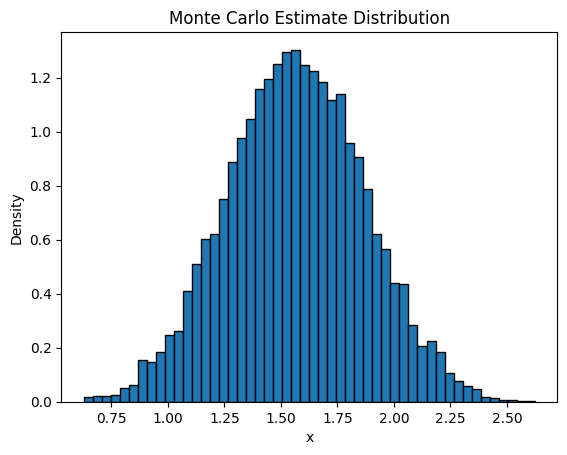

Mean value:  1.5667365293347273


In [5]:
# Part 2
"""
Produce 10 000 samples (use fewer if it takes too long) from the above distribution, 
put the answer in the variable `problem1_samples`, and plot the histogram.
"""
n_samples = 10000
problem1_samples = problem1_rejection(n_samples)



# Plotting:
plt.hist(problem1_samples, bins=50, density=True, edgecolor='black')
plt.title("Monte Carlo Estimate Distribution")
plt.xlabel("x")
plt.ylabel("Density")
plt.show()

print("Mean value: ", np.mean(problem1_samples))

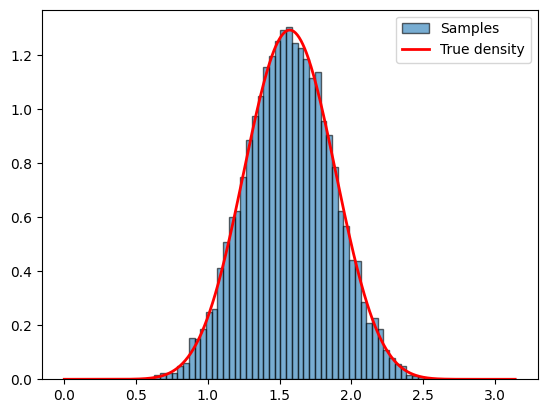

In [6]:
# Create histogram
plt.hist(problem1_samples, bins=50, density=True, alpha=0.6, edgecolor='black', label="Samples")

# Create x-range for plotting the true density
# p.linspace(start, stop, num) creates num evenly spaced points between start and stop inclusive.
# This means we 
# start at 0
# end at π
# create 500 equally spaced x-values
# Because the density we are sampling from is defined on: 0 <= x <= pi. This means we plot x values from within this range. 
x = np.linspace(0, np.pi, 500)

# Compute the unnormalized true density: f(x) ∝ (sin(x))^10
f_unnormalized = (np.sin(x))**10

# Normalize the curve so that its area becomes 1.
# trapz numerically integrates f_unnormalized over x.
f_normalized = f_unnormalized / np.trapezoid(f_unnormalized, x)

# Plot the true (normalized) density curve
plt.plot(x, f_normalized, 'r-', linewidth=2, label="True density")

# Add legend showing histogram vs true curve
plt.legend()

# Show the final plot
plt.show()

3. **[2p]** Define \(X\) as a random variable with the density given in part 1. Denote


$$Y = \left(X - \frac{\pi}{2}\right)^2$$


and use the 10 000 samples to estimate ${E}[Y]$. Store the result in `problem1_expectation`.

## Proposed solution:


### Part 3 – Estimating $\mathbb{E}[Y]$ with Monte Carlo

We have a random variable $X$ with the density from Part 1:
$$
f(x) \propto (\sin x)^{10}, \quad 0 \le x \le \pi.
$$

We define
$$
Y = \left( X - \frac{\pi}{2} \right)^2.
$$

We want to estimate the expectation
$$
\mathbb{E}[Y] = \mathbb{E}\left[ \left( X - \frac{\pi}{2} \right)^2 \right].
$$

Using Monte Carlo, if we have samples $X_1, X_2, \dots, X_n$ drawn from the distribution of $X$, then a natural estimator of $\mathbb{E}[Y]$ is
$$
\mathbb{E}[Y] \approx \frac{1}{n} \sum_{i=1}^n \left( X_i - \frac{\pi}{2} \right)^2.
$$

**Step-by-step procedure:**

1. Use the rejection sampling function from Part 1 to generate $n = 10\,000$ samples from the distribution of $X$:
   - $X_1, X_2, \dots, X_n$.

2. For each sample $X_i$, compute
   $$
   Y_i = \left( X_i - \frac{\pi}{2} \right)^2.
   $$

3. Approximate $\mathbb{E}[Y]$ by taking the average of these $Y_i$ values:
   $$
   \hat{\mathbb{E}}[Y] = \frac{1}{n} \sum_{i=1}^n Y_i.
   $$

4. In code, we can do this efficiently using NumPy by:
   - Storing all $X_i$ in an array (for example, `problem1_samples`),
   - Computing `Y = (problem1_samples - np.pi/2)**2`,
   - Then taking `np.mean(Y)`.

5. Finally, we store this estimate in the variable `problem1_expectation`.


In [7]:
# Part 3

# Number of samples (should match what you used before, e.g. 10 000)
n_samples = 10000

# If you already have samples from Part 2 in problem1_samples, you can reuse them:
# problem1_samples = problem1_rejection(n_samples)

# But in case you want to regenerate them here:
X_samples = problem1_rejection(n_samples)  # X_1, X_2, ..., X_n

# Compute Y = (X - pi/2)^2 for each sample.
# Thanks to NumPy, this is done elementwise for the whole array.
Y_values = (X_samples - (np.pi / 2))**2

# Monte Carlo estimate of E[Y] is just the sample mean of Y_values
problem1_expectation = np.mean(Y_values)

print("Estimated E[Y]:", problem1_expectation)


Estimated E[Y]: 0.09134571880124848


4. **[2p]** Use Hoeffding’s inequality to produce a 95% confidence interval of the expectation above and store the result as a tuple in the variable `problem1_interval`.

### Part 4 – Hoeffding’s inequality and a 95% confidence interval

We want a 95% confidence interval for the expectation of  
$Y = (X - \pi/2)^2$ ,  
where \(X\) has the density from Part 1 on $[0,\pi]$ .

---

#### 1. Estimator

From Part 3 we already have samples $(X_1, \dots, X_n)$ with $(n = 10000)$ and we defined

$$Y_i = (X_i - \pi/2)^2.$$

Our Monte Carlo estimator of $(\mathbb{E}[Y])$ is the sample mean

$$\overline{Y} = \frac{1}{n}\sum_{i=1}^n Y_i.$$

This sample mean is stored in the variable `problem1_expectation`.

---

#### 2. Bounds for \(Y\)

We need bounds $(a)$ and $(b)$ such that $(Y_i \in [a,b])$ .

Since $(X \in [0, \pi])$, the distance from $(\pi/2)$ is at most $(\pi/2)$ , so

$$0 \le |X - \pi/2| \le \pi/2.$$

Therefore

$$0 \le Y = (X - \pi/2)^2 \le (\pi/2)^2.$$

Thus

$$a = 0, \qquad b = (\pi/2)^2.$$

---

#### 3. Hoeffding’s inequality

For i.i.d. random variables $(Y_i \in [a, b])$ , Hoeffding’s inequality states:

$$
\mathbb{P}\left( \left| \overline{Y} - \mathbb{E}[Y] \right| \ge \varepsilon \right)
\le 2 \exp\left( \frac{-2 n \varepsilon^2}{(b-a)^2} \right).
$$

We want a 95% confidence interval, so let $(\delta = 0.05)$ , and choose $(\varepsilon)$ such that
 
$$
2 \exp\left( \frac{-2 n \varepsilon^2}{(b-a)^2} \right) = \delta.
$$

Solving for $(\varepsilon)$ :

$$
\varepsilon = (b-a)\sqrt{\frac{\ln(2/\delta)}{2n}}.
$$

---

#### 4. Confidence interval

A 95% confidence interval for $(\mathbb{E}[Y])$ is

$$
\left[\, \overline{Y} - \varepsilon,\; \overline{Y} + \varepsilon \,\right].
$$

In code we compute:

1. $(Y_i = (X_i - \pi/2)^2)$  
2. $(\overline{Y} = \text{mean}(Y_i))$  
3. $(\varepsilon = (b-a)\sqrt{\ln(2/\delta)/(2n)})$  
4. `problem1_interval = (overline_Y - epsilon, overline_Y + epsilon)`  


In [8]:
# Part 4
# Number of samples
n = len(Y_values)

# Bounds a, b for Y
# From the analysis: 0 <= Y <= (pi/2)^2
a = 0.0
b = (np.pi / 2) ** 2

# Confidence level: 95%  =>  delta = 0.05
delta = 0.05

# Hoeffding's inequality (two-sided):
# P(|Y_bar - E[Y]| >= epsilon) <= 2 * exp(-2 n epsilon^2 / (b-a)^2)
# Solve for epsilon so that RHS = delta:
# epsilon = (b - a) * sqrt( ln(2/delta) / (2n) )
epsilon = (b - a) * np.sqrt(np.log(2.0 / delta) / (2.0 * n))

# Construct the confidence interval around the sample mean
lower = problem1_expectation - epsilon
upper = problem1_expectation + epsilon

# Optionally, you can clip to [a, b], but it's not required:
# lower = max(a, lower)
# upper = min(b, upper)

# Store as requested (they ask for a tuple)
problem1_interval = (lower, upper)

# (Optional) print the result to inspect it
print("Estimated E[Y]:", problem1_expectation)
print("Hoeffding 95% CI for E[Y]:", problem1_interval)


Estimated E[Y]: 0.09134571880124848
Hoeffding 95% CI for E[Y]: (np.float64(0.05783590705904911), np.float64(0.12485553054344783))


5. **[4p]** Can you calculate an approximation of the value of \(C\) from part 1 using random samples?  
Provide a plot of the histogram from part 2 together with the true density as a curve (this requires the value of \(C\)).  
Explain what method you used and what answer you got.

### Part 5 – Estimating the normalizing constant \(C\)

We want to compute an approximation of the normalization constant in

$$
f(x) = C (\sin x)^{10}, \qquad 0 \le x \le \pi.
$$

Because $f$ is a density, it must integrate to 1:

$$
1 = \int_{0}^{\pi} C (\sin x)^{10}\,dx.
$$

Solving for \(C\):

$$
C = \frac{1}{\int_{0}^{\pi} (\sin x)^{10}\,dx }.
$$

We approximate the integral using Monte Carlo integration.  
Let $(U_1,\dots,U_N)$ be i.i.d. uniform samples on $([0,\pi])$ .  
Define $(h(x) = (sin x)^{10})$ .  
Then the Monte Carlo estimate of the integral is

$$
\widehat{I}
= \frac{\pi}{N} \sum_{i=1}^{N} h(U_i).
$$

Therefore the estimator for $(C)$ is

$$
\widehat{C}
= \frac{1}{\widehat{I}}.
$$

After computing $(\widehat{C})$ , we plot:

- the histogram of the rejection samples from Part 2  
- the curve
  $$
  \widehat{f}(x) = \widehat{C} (\sin x)^{10}
  $$

to compare the empirical distribution to the estimated true density.


In [9]:
# Part 5 — numeric computation of C

import numpy as np
import matplotlib.pyplot as plt

# ----------------------------------------------------
# 1. Monte Carlo estimate of the integral ∫ sin(x)^10 dx
# ----------------------------------------------------

N = 10000  # number of uniform samples to estimate C
U = np.random.uniform(0, np.pi, size=N)

h_vals = np.sin(U)**10

# Monte Carlo estimate of the integral
I_hat = (np.pi / N) * np.sum(h_vals)

# Estimated normalization constant
C_hat = 1 / I_hat
print("Estimated C:", C_hat)




Estimated C: 1.288709102898947


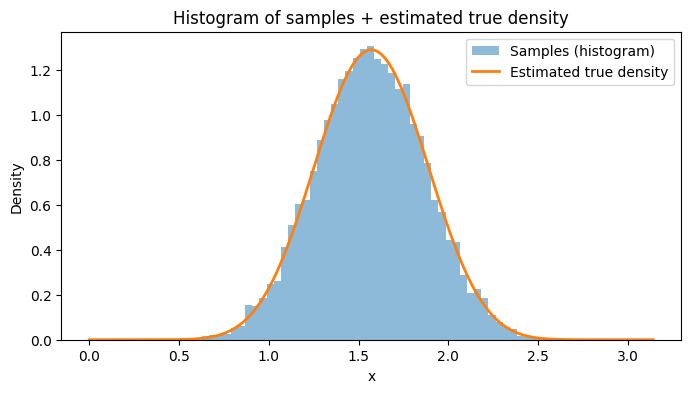

In [10]:
# Part 5 — plot
# Write your code to produce the plot here
# XXXXX
# ----------------------------------------------------
# 2. Plot histogram of rejection samples with estimated true density
# ----------------------------------------------------


x = problem1_samples  # your samples from problem1_rejection

plt.figure(figsize=(8, 4))
plt.hist(x, bins=50, density=True, alpha=0.5, label="Samples (histogram)")

# 3. Overlay estimated true density curve
x_grid = np.linspace(0, np.pi, 500)

# Now we have a value for C_hat so we use it. 
f_hat = C_hat * (np.sin(x_grid)**10) 
plt.plot(x_grid, f_hat, linewidth=2, label="Estimated true density")

plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.title("Histogram of samples + estimated true density")
plt.show()

## Part 5 — Explanation

Double-click to edit:

### Begin explanation

(Write your method and the approximation of C here.)

### End explanation


## Local Test for Exam vB, PROBLEM 1

Evaluate the cell below to verify that your answers have correct format.

Do NOT modify anything in the test cell.


In [11]:
# This cell checks the format, not correctness
import numpy as np

try:
    assert isinstance(problem1_rejection(10), np.ndarray)
except:
    print("Try again. You should return a numpy array from problem1_rejection")
else:
    print("Good, your problem1_rejection returns a numpy array")

try:
    assert isinstance(problem1_samples, np.ndarray)
except:
    print("Try again. your problem1_samples is not a numpy array")
else:
    print("Good, your problem1_samples is a numpy array")

try:
    assert isinstance(problem1_expectation, float)
except:
    print("Try again. your problem1_expectation is not a float")
else:
    print("Good, your problem1_expectation is a float")

try:
    assert (isinstance(problem1_interval, list) or isinstance(problem1_interval, tuple))
    assert len(problem1_interval) == 2
except Exception as e:
    print(e)
else:
    print("Good, your problem1_interval is a tuple or list of length 2")

Good, your problem1_rejection returns a numpy array
Good, your problem1_samples is a numpy array
Good, your problem1_expectation is a float
Good, your problem1_interval is a tuple or list of length 2


## 2.1 Exam vB, PROBLEM 2  
**Maximum Points: 13**

Consider the dataset `CORIS.csv` in the `data` folder. The dataset contains cases of coronary heart disease (CHD) and variables associated with the patient’s condition:

- systolic blood pressure (`sbp`)
- yearly tobacco use in kg (`tobacco`)
- low density lipoprotein (`ldl`)
- adiposity
- family history (0 or 1) (`famhist`)
- type A personality score (`typea`)
- obesity (body mass index)
- alcohol use
- age
- diagnosis of CHD (0 or 1) (`chd`)

Here:
- **X** corresponds to the measurements,
- **Y** is a 0–1 label where 1 represents CHD and 0 represents no CHD.

The code to load the data, perform a train–test–validation split, and train a model is already prepared for you.  
The trained model is stored in `problem2_pipe`, which is an `sklearn` `Pipeline`.

---

### **1. [3p]**

Use **Hoeffding’s inequality** and compute the **95% confidence intervals** for **precision and recall** (etc.) on the **test set**.  
Store your intervals for each class in the variables:

- `problem2_precision0`
- `problem2_recall0`
- `problem2_precision1`
- `problem2_recall1`

Each of these should be a **tuple** `(lower, upper)`.

---

### **2. [3p]**

You are interested in minimizing the **average cost** of your classifier.  
The hospital will use the model as a screening tool:

- If the model predicts **CHD = 1**, the patient is sent for further investigation.
- If the model predicts **CHD = 0**, nothing is done.

You decide to use the following costs:

- True positive (CHD = 1, predicted 1): cost = 0  
- True negative (CHD = 0, predicted 0): cost = 0  
- False positive (CHD = 0, predicted 1): cost = 10  
- False negative (CHD = 1, predicted 0): cost = 300  *(worst case)*

Complete the function `problem2_cost(model, threshold, X, Y)` to compute the **average cost per person** for a given prediction threshold, using `model.predict_proba`.

---

### **3. [4p]**

Select the **threshold** between 0 and 1 that minimizes the **average cost** on the **test set**.  
Check, for example, **100 evenly spaced thresholds** between 0 and 1.

Store:

- the optimal threshold in `problem2_optimal_threshold`
- the cost at this threshold (on the test set) in `problem2_cost_at_optimal_threshold`

---

### **4. [3p]**

With your newly computed threshold, compute the **cost of putting the model in production** by evaluating the cost on the **validation set**.

Also compute a **99% confidence interval** for this cost using **Hoeffding’s inequality**, and store it as:

- `problem2_cost_at_optimal_threshold_validation`
- `problem2_cost_interval = (lower, upper)`


In [12]:
# RUN THIS CELL TO LOAD THE DATA AND SPLIT IT INTO TRAINING, TEST AND VALIDATION SETS
# FINALLY IT TRAINS THE MODEL AS A PIPELINE

import pandas as pd
from sklearn.model_selection import train_test_split

CORISDataset = pd.read_csv("../../../data/CORIS.csv", skiprows=[1, 2])

# Initial data split into features and target
problem2_X = CORISDataset[
    ['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age']
].values  # Features
problem2_Y = CORISDataset['chd'].values  # Target variable

# Split the data into training, test and validation sets
problem2_X_train, X_tmp, problem2_Y_train, Y_tmp = train_test_split(
    problem2_X, problem2_Y, train_size=0.6, random_state=42
)
problem2_X_test, problem2_X_val, problem2_Y_test, problem2_Y_val = train_test_split(
    X_tmp, Y_tmp, train_size=0.5, random_state=42
)

# Show the shapes of the data
print(
    problem2_X_train.shape,
    problem2_Y_train.shape,
    problem2_X_test.shape,
    problem2_Y_test.shape,
    problem2_X_val.shape,
    problem2_Y_val.shape,
)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Create a pipeline with a scaler and a logistic regression model
problem2_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42)),
])

# Fit the pipeline to the training data
problem2_pipe.fit(problem2_X_train, problem2_Y_train)


(277, 9) (277,) (92, 9) (92,) (93, 9) (93,)


,steps,"[('scaler', ...), ('logreg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


Here:
- **X** corresponds to the measurements,
- **Y** is a 0–1 label where 1 represents CHD and 0 represents no CHD.

The code to load the data, perform a train–test–validation split, and train a model is already prepared for you.  
The trained model is stored in `problem2_pipe`, which is an `sklearn` `Pipeline`.

---

### **1. [3p]**

Use **Hoeffding’s inequality** and compute the **95% confidence intervals** for **precision and recall** (etc.) on the **test set**.  
Store your intervals for each class in the variables:

- `problem2_precision0`
- `problem2_recall0`
- `problem2_precision1`
- `problem2_recall1`

Each of these should be a **tuple** `(lower, upper)`.

---

### Hoeffding confidence intervals for precision and recall

We want 95% confidence intervals for precision and recall of each class on the test set, using Hoeffding's inequality.

Hoeffding's inequality for a Bernoulli random variable with true mean $p$, empirical mean $\hat p$ and sample size $n$ is

$$
\Pr\left( \left| \hat p - p \right| \ge \varepsilon \right) \le 2 e^{-2 n \varepsilon^2}.
$$

To obtain a 95% confidence interval, we set

$$
2 e^{-2 n \varepsilon^2} = 0.05.
$$

Solving for $\varepsilon$ gives

$$
\varepsilon = \sqrt{ -\frac{\ln(0.025)}{2n} }.
$$

Thus, for a statistic with empirical value $\hat p$ based on $n$ samples, the 95% Hoeffding confidence interval is

$$
\left[ \hat p - \varepsilon, \hat p + \varepsilon \right] \cap [0,1].
$$

We will apply this to precision and recall for each class. Using the confusion matrix with entries TN, FP, FN, TP (for class 1 considered as positive):

- Class 1 precision:
  $$
  \hat p_{\text{prec},1} = \frac{\text{TP}}{\text{TP} + \text{FP}}, \quad
  n_{\text{prec},1} = \text{TP} + \text{FP}.
  $$

- Class 1 recall:
  $$
  \hat p_{\text{rec},1} = \frac{\text{TP}}{\text{TP} + \text{FN}}, \quad
  n_{\text{rec},1} = \text{TP} + \text{FN}.
  $$

Treating class 0 as the positive class:

- Class 0 precision:
  $$
  \hat p_{\text{prec},0} = \frac{\text{TN}}{\text{TN} + \text{FN}}, \quad
  n_{\text{prec},0} = \text{TN} + \text{FN}.
  $$

- Class 0 recall:
  $$
  \hat p_{\text{rec},0} = \frac{\text{TN}}{\text{TN} + \text{FP}}, \quad
  n_{\text{rec},0} = \text{TN} + \text{FP}.
  $$

For each pair $ (\hat p, n) $, we compute

$$
\varepsilon = \sqrt{ -\frac{\ln(0.025)}{2n} }
$$

and then define

$$
\text{lower} = \max(0, \hat p - \varepsilon), \quad
\text{upper} = \min(1, \hat p + \varepsilon).
$$

The resulting intervals are stored as tuples:

- $\text{problem2\_precision0} = (\text{lower}, \text{upper})$ for class 0 precision,
- $\text{problem2\_recall0} = (\text{lower}, \text{upper})$ for class 0 recall,
- $\text{problem2\_precision1} = (\text{lower}, \text{upper})$ for class 1 precision,
- $\text{problem2\_recall1} = (\text{lower}, \text{upper})$ for class 1 recall.


In [13]:
# Part 1
# To make a prediction on a dataset `X` you can use the following code:
#   predictions = problem2_pipe.predict(X)
# As with any sklearn model, you can also use:
#   probas = problem2_pipe.predict_proba(X)

# Each precision and recall should be a tuple, for instance:
#   precision0 = (0.9, 0.95)
# The 0 or 1 in the variable name indicates the class.

#problem2_X_test
#problem2_Y_test

import numpy as np
from sklearn.metrics import confusion_matrix

# === 1. Get predictions on the test set ===
y_test = problem2_Y_test
y_pred = problem2_pipe.predict(problem2_X_test)

# === 2. Build the confusion matrix ===
# We specify labels=[0, 1] to ensure the order is TN, FP, FN, TP when we ravel()
tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0, 1]).ravel()
print("tn:", tn)
print("fp:", fp)
print("fn:", fn)
print("tp:", tp)

# === 3. Helper function to compute Hoeffding CI for a Bernoulli mean ===
def hoeffding_ci(p_hat, n, alpha=0.05):
    """
    Compute a (1 - alpha) Hoeffding confidence interval for a Bernoulli
    parameter with empirical mean p_hat based on n samples.

    Returns (lower, upper) clipped to [0, 1].
    """
    if n == 0:
        # No samples -> interval is undefined; here we can return (0.0, 1.0)
        return (0.0, 1.0)

    # epsilon = sqrt( - ln(alpha/2) / (2n) )
    eps = np.sqrt(-np.log(alpha / 2.0) / (2.0 * n))

    lower = max(0.0, p_hat - eps)
    upper = min(1.0, p_hat + eps)
    return (lower, upper)

# === 4. Compute empirical precision and recall for each class ===

# ---- Class 1 (positive class = 1) ----
# Precision1 = TP / (TP + FP)
n_prec1 = tp + fp
prec1_hat = tp / n_prec1 if n_prec1 > 0 else 0.0

# Recall1 = TP / (TP + FN)
n_rec1 = tp + fn
rec1_hat = tp / n_rec1 if n_rec1 > 0 else 0.0

# ---- Class 0 (positive class = 0) ----
# Precision0 = TN / (TN + FN)
n_prec0 = tn + fn
prec0_hat = tn / n_prec0 if n_prec0 > 0 else 0.0

# Recall0 = TN / (TN + FP)
n_rec0 = tn + fp
rec0_hat = tn / n_rec0 if n_rec0 > 0 else 0.0

# === 5. Compute Hoeffding 95% CIs for each of the four statistics ===
problem2_precision0 = hoeffding_ci(prec0_hat, n_prec0, alpha=0.05)
problem2_recall0    = hoeffding_ci(rec0_hat, n_rec0, alpha=0.05)
problem2_precision1 = hoeffding_ci(prec1_hat, n_prec1, alpha=0.05)
problem2_recall1    = hoeffding_ci(rec1_hat, n_rec1, alpha=0.05)

print("precision0:", problem2_precision0)
print("recall0   :", problem2_recall0)
print("precision1:", problem2_precision1)
print("recall1   :", problem2_recall1)

# The provided assertions should now pass:
assert(type(problem2_precision0) == tuple)
assert(len(problem2_precision0) == 2)
assert(type(problem2_recall0) == tuple)
assert(len(problem2_recall0) == 2)
assert(type(problem2_precision1) == tuple)
assert(len(problem2_precision1) == 2)
assert(type(problem2_recall1) == tuple)
assert(len(problem2_recall1) == 2)


tn: 49
fp: 9
fn: 15
tp: 19
precision0: (np.float64(0.5958623105324226), np.float64(0.9353876894675774))
recall0   : (np.float64(0.6665001207136134), 1.0)
precision1: (np.float64(0.42191436672646065), np.float64(0.9352284904163966))
recall1   : (np.float64(0.3259110409823518), np.float64(0.7917360178411776))


### **2. [3p]**

You are interested in minimizing the **average cost** of your classifier.  
The hospital will use the model as a screening tool:

- If the model predicts **CHD = 1**, the patient is sent for further investigation.
- If the model predicts **CHD = 0**, nothing is done.

You decide to use the following costs:

- True positive (CHD = 1, predicted 1): cost = 0  
- True negative (CHD = 0, predicted 0): cost = 0  
- False positive (CHD = 0, predicted 1): cost = 10  
- False negative (CHD = 1, predicted 0): cost = 300  *(worst case)*

Complete the function `problem2_cost(model, threshold, X, Y)` to compute the **average cost per person** for a given prediction threshold, using `model.predict_proba`.

---

### Part 2 – Cost-based evaluation of the classifier

We want to compute the **average cost per person** of the classifier for a given
threshold applied to the predicted probabilities.

The model is used as a screening tool:

- If the model predicts CHD = 1, the patient is sent for further investigation.
- If the model predicts CHD = 0, nothing is done.

We are given the following **costs**:

- True positive: CHD = 1, predicted 1 → cost = 0  
- True negative: CHD = 0, predicted 0 → cost = 0  
- False positive: CHD = 0, predicted 1 → cost = 10  
- False negative: CHD = 1, predicted 0 → cost = 300

We need to implement a function

$$
\text{problem2\_cost}(\text{model}, \text{threshold}, X, Y)
$$

that returns the **average cost per person** on the dataset \((X, Y)\).

---

### Step 1: Get predicted probabilities

The model is a scikit-learn pipeline that supports `predict_proba`.

For each person \(i\), we compute

$$
\hat p_i = \mathbb{P}(\text{CHD} = 1 \mid X_i)
$$

using

```python
pred_proba = model.predict_proba(X)[:, 1]


In [14]:
# Part 2
def problem2_cost(model, threshold, X, Y):
    """
    Compute the average cost per person for a given model, threshold, and dataset (X, Y).

    Costs:
        - True positive  (Y=1, pred=1): 0
        - True negative  (Y=0, pred=0): 0
        - False positive (Y=0, pred=1): 10
        - False negative (Y=1, pred=0): 300
    """

    # 1. Get predicted probabilities for class 1 (CHD = 1)
    # model.predict_proba(X) returns an array of shape (n_samples, 2)
    # [:, 1] selects the probability of class 1 for each sample
    pred_proba = model.predict_proba(X)[:, 1]

    # 2. Convert probabilities to hard predictions using the threshold
    # If prob >= threshold -> predict 1, else 0
    predictions = (pred_proba >= threshold) * 1

    # 3. Count false positives and false negatives
    # False positive: true label 0, predicted 1
    fp = np.sum((Y == 0) & (predictions == 1))

    # False negative: true label 1, predicted 0
    fn = np.sum((Y == 1) & (predictions == 0))

    # 4. Compute total cost using the cost table
    total_cost = fp * 10 + fn * 300

    # 5. Compute and return average cost per person
    average_cost = total_cost / len(Y)
    return average_cost


### **3. [4p]**

Select the **threshold** between 0 and 1 that minimizes the **average cost** on the **test set**.  
Check, for example, **100 evenly spaced thresholds** between 0 and 1.

Store:

- the optimal threshold in `problem2_optimal_threshold`
- the cost at this threshold (on the test set) in `problem2_cost_at_optimal_threshold`

---

### Part 3 – Finding the cost-minimizing threshold

We now want to **choose a classification threshold** (between 0 and 1) that **minimizes the average cost** on the **test set**.

We have already defined a function

$$
\text{problem2\_cost}(\text{model}, \text{threshold}, X, Y)
$$

which returns the **average cost per person** using the cost table

- False positive: cost = 10  
- False negative: cost = 300  
- True positive/true negative: cost = 0.

Now we want to search over many possible thresholds and pick the one that gives the **lowest average cost** on the test data $((X_{\text{test}}, Y_{\text{test}}))$ .

---

### Step 1: Decide on a grid of thresholds

The problem suggests checking **100 evenly spaced thresholds between 0 and 1**.

We can do this with NumPy:

```python
thresholds = np.linspace(0, 1, 100)


In [15]:
# Part 3 – Find the threshold that minimizes average cost on the test set

# We assume that:
# - problem2_cost(model, threshold, X, Y) is already defined (from Part 2)
# - problem2_pipe is our trained pipeline model
# - problem2_X_test and problem2_Y_test are the test features and labels

# 1. Create 100 evenly spaced thresholds between 0 and 1
thresholds = np.linspace(0, 1, 100)

# 2. Initialize "best" values
best_cost = np.inf          # start with +infinity so any real cost will be smaller
best_threshold = None       # will store the threshold that gives the lowest cost

# 3. Loop over all thresholds and compute the average cost on the test set
for t in thresholds:
    # Compute average cost per person on the test set for this threshold
    cost_t = problem2_cost(problem2_pipe, t, problem2_X_test, problem2_Y_test)
    
    # If this cost is lower than what we have seen so far, update the best values
    if cost_t < best_cost:
        best_cost = cost_t
        best_threshold = t

# 4. Store the results in the required variables
problem2_optimal_threshold = best_threshold
problem2_cost_at_optimal_threshold = best_cost

# (Optional) print for inspection
print("Optimal threshold:", problem2_optimal_threshold)
print("Cost at optimal threshold on test set:", problem2_cost_at_optimal_threshold)


Optimal threshold: 0.07070707070707072
Cost at optimal threshold on test set: 5.217391304347826


### **4. [3p]**

With your newly computed threshold, compute the **cost of putting the model in production** by evaluating the cost on the **validation set**.

Also compute a **99% confidence interval** for this cost using **Hoeffding’s inequality**, and store it as:

- `problem2_cost_at_optimal_threshold_validation`
- `problem2_cost_interval = (lower, upper)`

### Part 4 – Cost on validation set and 99% Hoeffding confidence interval

Now we want to estimate the **cost of putting the model in production**.

Conceptually, we do this by:

1. Fixing the **threshold** we already chose in Part 3 (the one that minimized cost on the **test set**):
   $$
   \text{problem2\_optimal\_threshold}.
   $$

2. Evaluating the **average cost per person** on the **validation set**:
   $$
   (X_{\text{val}}, Y_{\text{val}}).
   $$

3. Using **Hoeffding’s inequality** to compute a **99% confidence interval** for this cost, based on the validation data. :contentReference[oaicite:0]{index=0}

---

### Step 1: Compute the cost on the validation set

We already implemented a function

$$
\text{problem2\_cost}(\text{model}, \text{threshold}, X, Y),
$$

which returns the **average cost per person** using the cost table:

- False positive: cost = 10  
- False negative: cost = 300  
- True positive / true negative: cost = 0.

Now we use:

- `model = problem2_pipe`
- `threshold = problem2_optimal_threshold` (from Part 3)
- `X = problem2_X_val`
- `Y = problem2_Y_val`

So the **production (validation) cost estimate** is

$$
\hat c_{\text{val}} = \text{problem2\_cost}(\text{problem2\_pipe},
                                             \text{problem2\_optimal\_threshold},
                                             X_{\text{val}}, Y_{\text{val}}).
$$

We store this in

```python
problem2_cost_at_optimal_threshold_validation





---

### Step 2: Treat the cost as a bounded random variable

Each individual's cost belongs to:

- 0  
- 10  
- 300  

so each cost $C_i$ lies in the interval:

$$
C_i \in [0, 300].
$$

The average validation cost is the empirical mean:

$$
\hat c_{\text{val}} = \frac{1}{n} \sum_{i=1}^n C_i,
$$

where

$$
n = \text{len}(Y_{\text{val}}).
$$

---

### Step 3: 99% Hoeffding interval for bounded variables

Hoeffding’s inequality for random variables in $[a, b]$ states:

$$
\Pr\left( 
\left| \hat c_{\text{val}} - \mathbb{E}[C] \right|
\ge \varepsilon
\right)
\le
2 \exp\left(
-\frac{2 n \varepsilon^2}{(b - a)^2}
\right).
$$

For a **99% confidence interval**, we use:

$$
\delta = 0.01.
$$

Setting the Hoeffding bound equal to $\delta$:

$$
2 \exp\left(
-\frac{2 n \varepsilon^2}{(b - a)^2}
\right)
= \delta
$$

Solving for $\varepsilon$ gives:

$$
\varepsilon = (b - a)\sqrt{
-\frac{\ln(\delta/2)}{2n}
}.
$$

In our case:

$$
a = 0, \quad b = 300,
$$

so

$$
\varepsilon = 300 \sqrt{
-\frac{\ln(0.01/2)}{2n}
}.
$$

---

### Step 4: Build the confidence interval

A 99% Hoeffding confidence interval for the true average cost is:

$$
\left[
\hat c_{\text{val}} - \varepsilon,
\;
\hat c_{\text{val}} + \varepsilon
\right].
$$

Because cost cannot be negative or above 300:

$$
\text{lower} = \max(0, \hat c_{\text{val}} - \varepsilon),
$$

$$
\text{upper} = \min(300, \hat c_{\text{val}} + \varepsilon).
$$

We store the interval in:


---

### Step 2: Treat the cost as a bounded random variable

Each individual's cost belongs to:

- 0  
- 10  
- 300  

so each cost $C_i$ lies in the interval:

$$
C_i \in [0, 300].
$$

The average validation cost is the empirical mean:

$$
\hat c_{\text{val}} = \frac{1}{n} \sum_{i=1}^n C_i,
$$

where

$$
n = \text{len}(Y_{\text{val}}).
$$

---

### Step 3: 99% Hoeffding interval for bounded variables

Hoeffding’s inequality for random variables in $[a, b]$ states:

$$
\Pr\left( 
\left| \hat c_{\text{val}} - \mathbb{E}[C] \right|
\ge \varepsilon
\right)
\le
2 \exp\left(
-\frac{2 n \varepsilon^2}{(b - a)^2}
\right).
$$

For a **99% confidence interval**, we use:

$$
\delta = 0.01.
$$

Setting the Hoeffding bound equal to $\delta$:

$$
2 \exp\left(
-\frac{2 n \varepsilon^2}{(b - a)^2}
\right)
= \delta
$$

Solving for $\varepsilon$ gives:

$$
\varepsilon = (b - a)\sqrt{
-\frac{\ln(\delta/2)}{2n}
}.
$$

In our case:

$$
a = 0, \quad b = 300,
$$

so

$$
\varepsilon = 300 \sqrt{
-\frac{\ln(0.01/2)}{2n}
}.
$$

---

### Step 4: Build the confidence interval

A 99% Hoeffding confidence interval for the true average cost is:

$$
\left[
\hat c_{\text{val}} - \varepsilon,
\;
\hat c_{\text{val}} + \varepsilon
\right].
$$

Because cost cannot be negative or above 300:

$$
\text{lower} = \max(0, \hat c_{\text{val}} - \varepsilon),
$$

$$
\text{upper} = \min(300, \hat c_{\text{val}} + \varepsilon).
$$

We store the interval in:

problem2_cost_interval = (lower, upper)

In [16]:
# Part 4

# 1. Compute the average cost per person on the validation set
#    using the optimal threshold found on the test set (from Part 3).
problem2_cost_at_optimal_threshold_validation = problem2_cost(
    problem2_pipe,
    problem2_optimal_threshold,
    problem2_X_val,
    problem2_Y_val
)

# 2. Use Hoeffding's inequality to compute a 99% confidence interval
#    for the true average cost.

# Number of validation samples
n_val = len(problem2_Y_val)

# Bounds on individual cost: each C_i is in [a, b] = [0, 300]
a = 0.0
b = 300.0

# Confidence level: 99% -> alpha = 0.01
alpha = 0.01

# Hoeffding epsilon for bounded RVs in [a, b]:
# epsilon = (b - a) * sqrt( - ln(alpha / 2) / (2n) )
eps = (b - a) * np.sqrt(-np.log(alpha / 2.0) / (2.0 * n_val))

# 3. Build the confidence interval around the empirical mean cost
lower = max(a, problem2_cost_at_optimal_threshold_validation - eps)
upper = min(b, problem2_cost_at_optimal_threshold_validation + eps)

# Store as required
problem2_cost_interval = (lower, upper)

# (Optional) print to inspect
print("Validation cost at optimal threshold:",
      problem2_cost_at_optimal_threshold_validation)
print("99% Hoeffding CI for validation cost:", problem2_cost_interval)

Validation cost at optimal threshold: 5.698924731182796
99% Hoeffding CI for validation cost: (0.0, np.float64(56.33193719889502))


In [17]:
# The code below will tell you if you filled in the interval correctly
assert(type(problem2_cost_interval) == tuple)
assert(len(problem2_cost_interval) == 2)

# 2.2 Exam vB, PROBLEM 3  
**Maximum Points: 13**

![Markov Chains](exam240828-markovImage.png)

Consider the following two Markov chains:

**Markov chain A**  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Markov chain B**


Answer each question for **both chains**:

---

### **1. [2p]**  
What is the **transition matrix**?  
Your answer for each chain should be a NumPy array of shape `(n_states, n_states)`  
where states `(A, B, …)` correspond to indices `(0, 1, …)`.

---

### **2. [1p]**  
Is the Markov chain **irreducible**?  
Answer with `True` or `False` for each chain.

---

### **3. [4p]**  
Is the Markov chain **aperiodic**?  
What is the **period of each state**?

Provide:

- a boolean (`True`/`False`) indicating if the chain is aperiodic
- a NumPy array with the **period of each state**, shape `(n_states,)`

*Hint:* Recall the definition of period:  

$$\text{period}(i) = \gcd\{\, t \ge 1 : P(X_t = i \mid X_0 = i) > 0 \,\}$$


---

### **4. [2p]**  
If the chain starts in state A at time 0, what is the probability of being in state B at time 5?  

Store this in:

- `problem3_A_PB5`
- `problem3_B_PB5`

---

### **5. [4p]**  
Let \(T\) be the **first hitting time of state D**, starting from state A:


$$T(\omega) = \inf \{\, t \in \mathbb{N} : X_t(\omega) = D \,\}$$


where the infimum over an empty set is $\infty$.

Compute:

- $P(T = 1)$  
- $P(T = 2)$  
- $P(T = 3)$  
- $P(T = 4)$  
- $P(T = 5)$  
- $P(T = \infty)$  


for both chains A and B, and store them in the provided variables.


---

### **1. [2p]**  
What is the **transition matrix**?  
Your answer for each chain should be a NumPy array of shape `(n_states, n_states)`  
where states `(A, B, …)` correspond to indices `(0, 1, …)`.

---

In [18]:
# PART 1
# ------------------------ TRANSITION MATRIX -------------------------------

# Supply each transition matrix as a numpy array of shape (n_states, n_states).
# State order must match exam order, typically (A, B, C, D, ...).

problem3_A = np.array([[0,0.2,0,0.8], [0,0,1,0], [0,1,0,0], [0.5,0,0.5,0]])
print("Array A: \n", problem3_A)
problem3_B = np.array([[0,1,0,0,0,0], [0,0,1,0,0,0], [0,0.5,0,0.5,0,0], [0,0,0.5,0,0.5,0], [0,0,0,0,0,1], [0.5,0,0,0,0.5,0]])
print("Array B: \n", problem3_B)

Array A: 
 [[0.  0.2 0.  0.8]
 [0.  0.  1.  0. ]
 [0.  1.  0.  0. ]
 [0.5 0.  0.5 0. ]]
Array B: 
 [[0.  1.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0. ]
 [0.  0.5 0.  0.5 0.  0. ]
 [0.  0.  0.5 0.  0.5 0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.5 0.  0.  0.  0.5 0. ]]


---

### **2. [1p]**  
Is the Markov chain **irreducible**?  
Answer with `True` or `False` for each chain.

---

A Markov chain is irreducible if:
* You can get from every state to every other state
* As long as there is some path with positive probability
* If matrix has no zeros at all, it's trivially irreducible, because all transitions can occur in 1 step
* This does not need to necessarily happen in one step. 
* SO: 
    * No zeros in matrix -> irreducible

---

### Matrix A: checking irreducibility

We label the states according to the problem:

- State 1: A  
- State 2: B  
- State 3: C  
- State 4: D  

The transition matrix \(P_A\) is:

$$
P_A =
\begin{pmatrix}
0 & 0.2 & 0 & 0.8 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0 \\
0.5 & 0 & 0.5 & 0
\end{pmatrix}
$$

This means:

- From **A (1)**:
  - To B (2) with probability 0.2
  - To D (4) with probability 0.8

- From **B (2)**:
  - To C (3) with probability 1

- From **C (3)**:
  - To B (2) with probability 1

- From **D (4)**:
  - To A (1) with probability 0.5
  - To C (3) with probability 0.5

Now check **reachability** step by step:

1. **From A (1)**:
   - In 1 step: can reach B and D.
   - From B, you can go to C.
   - From D, you can go to A or C.
   - So, starting from A, you can eventually visit **A, B, C, D**.

2. **From D (4)**:
   - In 1 step: can reach A or C.
   - From A, you can reach B and D.
   - From C, you can reach B.
   - So from D, you can also reach **A, B, C, D**.

3. **From B (2)**:
   - In 1 step: goes to C.
   - From C, it goes back to B.
   - The only possible states if you start in B are **B and C**, bouncing between them.
   - You can **never** reach A or D from B.

4. **From C (3)**:
   - In 1 step: goes to B.
   - From B, back to C.
   - So starting from C, you also stay in the set **{B, C}** forever.
   - You can **never** reach A or D from C.

So the state space splits into communicating classes:

- \(\{A, D\}\) communicates with each other and can reach \(\{B, C\}\), but…
- \(\{B, C\}\) **cannot** reach \(\{A, D\}\).

Because there exist states \(i, j\) (for example \(i = 2\) (B), \(j = 1\) (A)) such that:

$$
(P_A^n)_{2,1} = 0 \quad \text{for all } n \ge 1,
$$

the chain is **not** irreducible.

**Conclusion for Matrix A:**

- The chain is **reducible**.
- In code: `problem3_A_irreducible = False`.

---

### Matrix B: checking irreducibility

Now consider Matrix B with 6 states:

- State 1  
- State 2  
- State 3  
- State 4  
- State 5  
- State 6  

The transition matrix \(P_B\) (from your code) corresponds to:

- From **1**:
  - To 2 with probability 1

- From **2**:
  - To 3 with probability 1

- From **3**:
  - To 2 with probability 0.5
  - To 4 with probability 0.5

- From **4**:
  - To 3 with probability 0.5
  - To 5 with probability 0.5

- From **5**:
  - To 6 with probability 1

- From **6**:
  - To 1 with probability 0.5
  - To 5 with probability 0.5

We now check if every state can reach every other state.

1. **Reachability from 1**:
   - 1 → 2 (one step)
   - 2 → 3
   - 3 → 4 (with positive probability)
   - 4 → 5
   - 5 → 6
   - So from state 1 you can reach states 2, 3, 4, 5, 6.

2. **Reachability back to 1**:
   - From 6 → 1 (directly with probability 0.5).
   - So going around the chain we have a cycle:
     - 1 → 2 → 3 → 4 → 5 → 6 → 1

3. **From any state to any other**:
   - Because there is a cycle visiting all states (1 → 2 → 3 → 4 → 5 → 6 → 1), and the extra transitions (like 3 ↔ 2 and 4 ↔ 3, 6 ↔ 5) do not block anything, we can argue:
     - From any state \(i\), you can move along this “ring” to reach any other state \(j\) in some number of steps.
   - Formally, for all \(i, j \in \{1, \dots, 6\}\), there exists some \(n \ge 1\) such that:
     $$
     (P_B^n)_{ij} > 0
     $$

Therefore, the directed graph of this chain is **strongly connected**: every state can eventually reach every other state with positive probability.

**Conclusion for Matrix B:**

- The chain is **irreducible**.
- In code: `problem3_B_irreducible = True`.

---

### Final summary

- Irreducible means:  
  $ \forall i, j,\ \exists n \ge 1 \text{ such that } (P^n)_{ij} > 0. $  
  Every state can reach every other state in some number of steps.

- **Matrix A**: Not irreducible because states B and C can never reach A or D.  
  `problem3_A_irreducible = False`

- **Matrix B**: Irreducible because all 6 states are connected in a way that you can move from any state to any other via some path with positive probability.  
  `problem3_B_irreducible = True`

In [19]:
# PART 2
# ------------------------ IRREDUCIBLE -------------------------------

problem3_A_irreducible = False
problem3_B_irreducible = True

---

### **3. [4p]**  
Is the Markov chain **aperiodic**?  
What is the **period of each state**?

Provide:

- a boolean (`True`/`False`) indicating if the chain is aperiodic
- a NumPy array with the **period of each state**, shape `(n_states,)`

*Hint:* Recall the definition of period:  

$$\text{period}(i) = \gcd\{\, t \ge 1 : P(X_t = i \mid X_0 = i) > 0 \,\}$$


---

## Concepts Explained Simply

### Period of a State

Think of a state in a Markov chain as a room you start in.  
You walk around according to the transition probabilities.  
The **period** of a state tells you:

➡️ What is the greatest common divisor (gcd) of all times t where you can return to that same room exactly at time t?

Formally:

$$ period(i) = gcd \{ t \ge 1 : P(X_t = i \mid X_0 = i) > 0 \} $$

If you can return in 2, 4, 6, ... steps, the period is 2.  
If you can return in 1, 2, 3, 4..., the gcd is 1 → period is 1.

---

### Aperiodic Markov Chain

A Markov chain is **aperiodic** if every state has period 1.

➡️ Means you are **not forced** into a repeating cycle.

If even one state has a period greater than 1, the chain is **not aperiodic**.

---

## Your Results

For both Matrix A and Matrix B, every state has period 2.

Therefore:

- problem3_A_is_aperiodic = False  
- problem3_B_is_aperiodic = False  
- problem3_A_periods = [2, 2, 2, 2]  
- problem3_B_periods = [2, 2, 2, 2, 2, 2]

---

## Why Matrix A Is Not Aperiodic (Period Analysis)

Matrix A transitions:

- A → B or D  
- B → C  
- C → B  
- D → A or C  

This structure divides the states into two groups:

- Group 1: {A, C}  
- Group 2: {B, D}

Every transition moves from one group to the other.  
There are **no** transitions that stay within a group and **no self-loops**.

This means the chain **alternates** between Group 1 and Group 2 every step:

- If you start in Group 1, after one step you must be in Group 2.  
- After two steps, you return to Group 1.  
- After three steps, back to Group 2.  
- etc.

A return to the same state requires landing in the same group — this only happens at **even** time steps.

Example for state B:

- B → C → B (return in 2 steps)  
- B → C → B → C → B (return in 4 steps)  
and so on.

Thus the return times are:

$$ \{2, 4, 6, \dots\} $$

so the period is:

$$ gcd\{2,4,6,\dots\} = 2 $$

All states in Matrix A communicate and share the same period.  
Therefore:

- Each state has period 2  
- The chain is **not** aperiodic  

---

## Why Matrix B Is Not Aperiodic (Period Analysis)

Matrix B transitions:

- 0 → 1  
- 1 → 2  
- 2 → 1 or 3  
- 3 → 2 or 4  
- 4 → 5  
- 5 → 0 or 4  

This again forms two alternating groups:

- Group 1: {0, 2, 4}  
- Group 2: {1, 3, 5}

Check transitions:

- 0 (G1) → 1 (G2)  
- 1 (G2) → 2 (G1)  
- 2 (G1) → 1 or 3 (both G2)  
- 3 (G2) → 2 or 4 (both G1)  
- 4 (G1) → 5 (G2)  
- 5 (G2) → 0 or 4 (both G1)  

All transitions move between the two groups.  
There are **no** transitions staying inside a group and **no self-loops**.

Thus the chain **must alternate** between the groups every step.

Example for state 1:

- 1 → 2 → 1 (return in 2 steps)  
- 1 → 2 → 1 → 2 → 1 (return in 4 steps)

Return times:

$$ \{2, 4, 6, \dots\} $$

Therefore:

$$ gcd\{2,4,6,\dots\} = 2 $$

Every state in Matrix B is in the same communicating class,  
so each state has period 2.

Thus Matrix B is **not** aperiodic.

---

## Summary of Both Matrices

- Both matrices have bipartite (two-group alternating) structure.  
- All returns occur only on even-numbered time steps.  
- Therefore all states in both chains have period 2.  
- A Markov chain is aperiodic only when all periods are 1.  
- Neither chain satisfies this.

Both chains are **not aperiodic** and have **period 2 for all states**.


In [20]:
# PART 3
# ------------------------ APERIODIC -------------------------------
import math
# Answer each with True or False
problem3_A_is_aperiodic = False
problem3_B_is_aperiodic = False

# A numpy array of shape (n_states,) containing periods for each state
problem3_A_periods = np.array([2,2,2,2])
problem3_B_periods = np.array([2,2,2,2,2,2])

print(math.gcd(3,2,2,2))

1


---

### **4. [2p]**  
If the chain starts in state A at time 0, what is the probability of being in state B at time 5?  

Store this in:

- `problem3_A_PB5`
- `problem3_B_PB5`

---

### Part 4 – Probability of being in state B after 5 steps

To find the probability of being in state B after 5 steps when starting in state A, we simply:

1. Compute the 5-step transition matrix $ P^5 $ by using `matrix_power(P, 5)`.

2. Look at the entry in **row A, column B** of this matrix.  
   That value is the probability of being in state B after 5 steps.

Since we start in A with probability 1, the A→B entry in  $ P^5 $ directly gives the answer.


In [21]:
# PART 4
# ------------------------ PROBABILITY OF B AFTER 5 STEPS -------------------------------

# PART 1
# ------------------------ TRANSITION MATRIX -------------------------------

# # State order: A, B, C, D
# problem3_A = np.array([
#     [0,   0.2, 0,   0.8],
#     [0,   0,   1,   0  ],
#     [0,   1,   0,   0  ],
#     [0.5, 0,   0.5, 0  ]
# ])

# # State order: A, B, C, D, E, F
# problem3_B = np.array([
#     [0,   1,   0,   0,   0,   0],
#     [0,   0,   1,   0,   0,   0],
#     [0,   0.5, 0,   0.5, 0,   0],
#     [0,   0,   0.5, 0,   0.5, 0],
#     [0,   0,   0,   0,   0,   1],
#     [0.5, 0,   0,   0,   0.5, 0]
# ])

P5_A = np.linalg.matrix_power(problem3_A, 5)
P5_B = np.linalg.matrix_power(problem3_B, 5)
# could also do this: P5_A[0][1]

print("P^5 for problem3_A:\n", P5_A)
print("P^5 for problem3_B:\n", P5_B)

print("Problem3_A_PA5: ", P5_A[0][1])
problem3_A_PA5 = 0.872
problem3_B_PB5 = 0.375

P^5 for problem3_A:
 [[0.    0.872 0.    0.128]
 [0.    0.    1.    0.   ]
 [0.    1.    0.    0.   ]
 [0.08  0.    0.92  0.   ]]
P^5 for problem3_B:
 [[0.      0.375   0.      0.375   0.      0.25   ]
 [0.125   0.      0.5625  0.      0.3125  0.     ]
 [0.      0.40625 0.      0.28125 0.      0.3125 ]
 [0.1875  0.      0.53125 0.      0.28125 0.     ]
 [0.      0.5     0.      0.25    0.      0.25   ]
 [0.125   0.      0.625   0.      0.25    0.     ]]
Problem3_A_PA5:  0.872


---

### **5. [4p]**  
Let \(T\) be the **first hitting time of state D**, starting from state A:


$$T(\omega) = \inf \{\, t \in \mathbb{N} : X_t(\omega) = D \,\}$$


where the infimum over an empty set is $\infty$.

Compute:

- $P(T = 1)$  
- $P(T = 2)$  
- $P(T = 3)$  
- $P(T = 4)$  
- $P(T = 5)$  
- $P(T = \infty)$  


for both chains A and B, and store them in the provided variables.

In [22]:
# Answer the following probabilities for T=1,2,3,4,5 and infinity

# PART 5
# ------------------------ HITTING TIME DISTRIBUTION -------------------------------

# Probabilities for T = 1, 2, 3, 4, 5, and ∞ for chain A
problem3_A_PT1 = 0.8
problem3_A_PT2 = 0.0
problem3_A_PT3 = 0.0
problem3_A_PT4 = 0.0
problem3_A_PT5 = 0.0
problem3_A_PT_inf = 0.2  #1 - 0.8 = 0.2

# Probabilities for chain B
problem3_B_PT1 = 0.0
problem3_B_PT2 = 0.0
problem3_B_PT3 = 0.5
problem3_B_PT4 = 0.0
problem3_B_PT5 = 0.25
problem3_B_PT_inf = 0.0